<a href="https://colab.research.google.com/github/Raihan-J/Data-Compression-And-Encryption/blob/master/Exp-5%20Audio%20Compression/Saregama.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Install this before Running the Code*

In [ ]:
!pip3 install simpleaudio
!pip3 install wavio

In [2]:
import numpy as np
import simpleaudio as sa
from itertools import repeat
from IPython.display import Audio
from scipy.io import wavfile
import wavio
import matplotlib.pyplot as plt

In [3]:
sargamdict = {"sa":261, 
             "re":294,
             "ga":330,
             "ma":349,
             "pa":392,
             "dha":440,
             "ni":494,
             "sa1":515}

In [4]:
def play_audio(audio):# normalize to 16-bit range
    audio *= 32767 / np.max(np.abs(audio))
    # convert to 16-bit data
    audio = audio.astype(np.int16)
 
    # start playback
    play_obj = sa.play_buffer(audio, 1, 2, sample_rate)
 
    # wait for playback to finish before exiting
    play_obj.wait_done()

In [5]:
# get timesteps for each sample, T is note duration in seconds
# For CD recordings, the industry standard is to store each audio sample 
# as a 16-bit value, at 44100 samples per second.
sample_rate = 44100
T = 1
t = np.linspace(0, T, T * sample_rate, endpoint=False)

In [6]:
# generate sine wave notes for sa re ga ma
Sa_note = np.sin(sargamdict["sa"] * t * 3 * np.pi)
Re_note = np.sin(sargamdict["re"] * t * 3 * np.pi)
Ga_note = np.sin(sargamdict["ga"] * t * 3* np.pi)
Ma_note = np.sin(sargamdict["ma"] * t * 3 * np.pi)
Pa_note = np.sin(sargamdict["pa"] * t * 3 * np.pi)
Dha_note = np.sin(sargamdict["dha"] * t * 3 * np.pi)
Ni_note = np.sin(sargamdict["ni"] * t * 3 * np.pi)
Sa1_note = np.sin(sargamdict["sa1"] * t * 3 * np.pi)

In [7]:
get_pause  = lambda seconds: repeat(0, int(seconds * sample_rate))
pause_note=list(get_pause(0.01))
sargam = np.hstack((pause_note,Sa_note,pause_note,Re_note,pause_note,Ga_note,
                   pause_note,Ma_note, pause_note,Pa_note, pause_note,
                    Dha_note, pause_note,Ni_note, pause_note, Sa1_note,pause_note))

In [8]:
data = sargam

In [9]:
Audio(data,rate=sample_rate)

**For Exporting Audio File**

In [10]:
fs = 44100 
s2 = np.append(sargam,sargam[::-1])
wavio.write("saregama.wav", s2, fs, scale=None,sampwidth=3)

**Plotting Graph Using Matplotlib**

Text(0.5, 1.0, 'Graph For Sa1 Note')

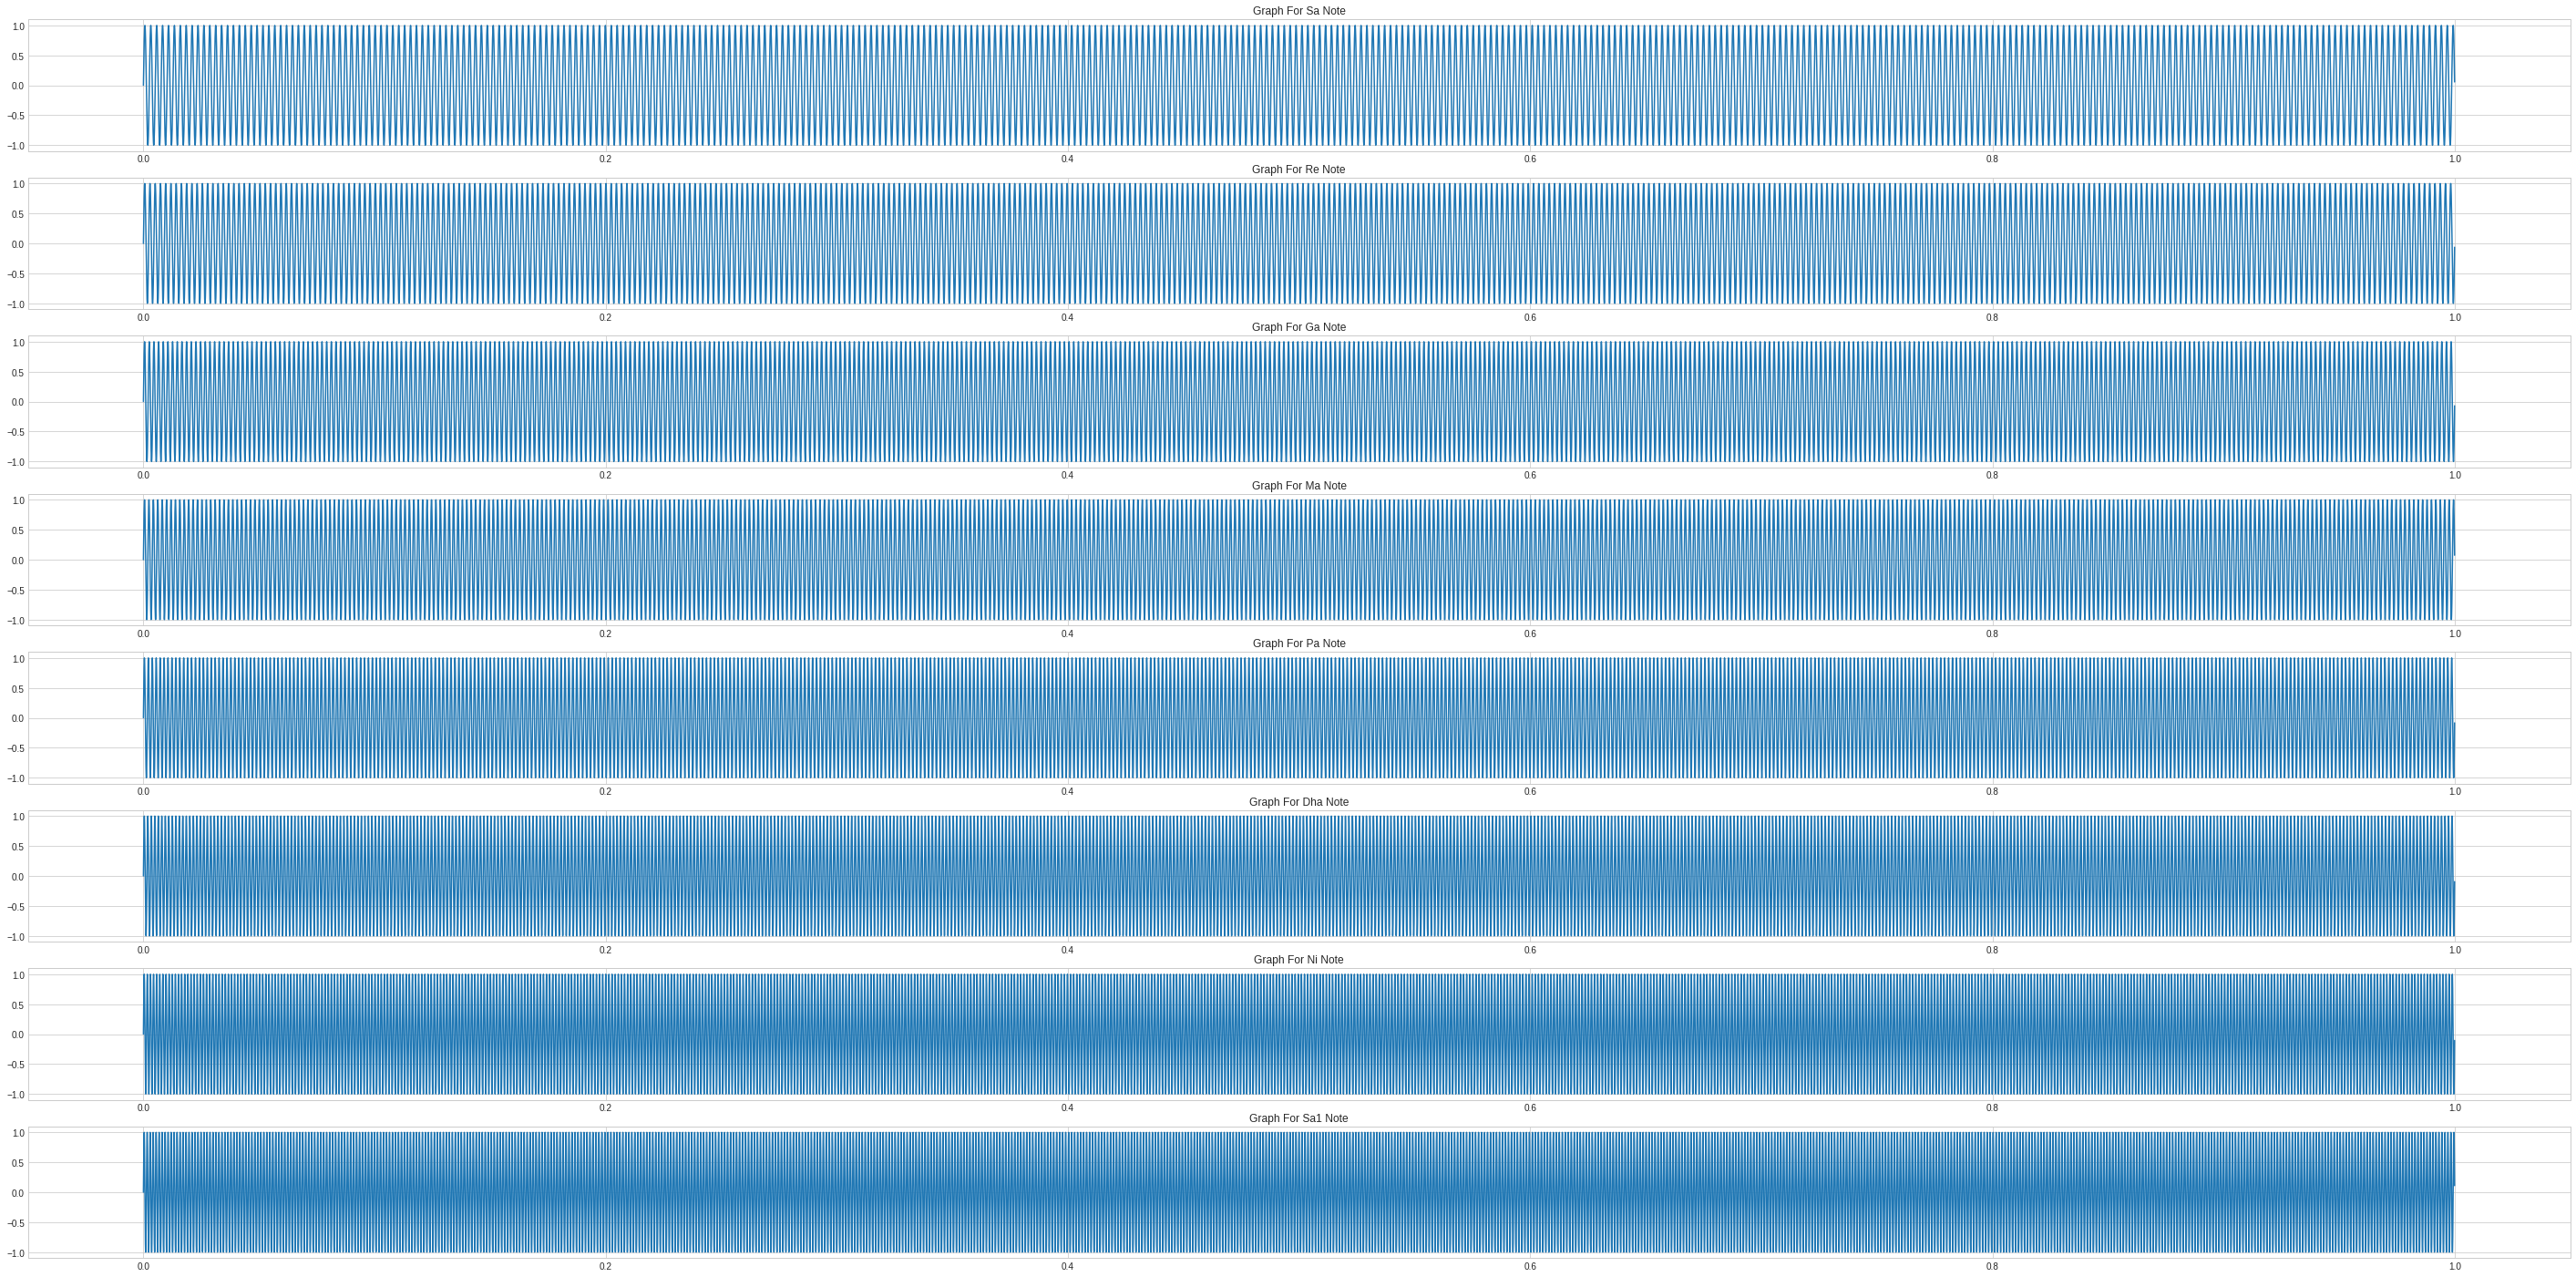

In [11]:
%matplotlib inline
plt.style.use('seaborn-whitegrid')

plt.figure(figsize=(50,25))

plt.subplot(8, 1, 1)                           
plt.plot(t, Sa_note);
plt.gca().set_title('Graph For Sa Note')

plt.subplot(8, 1, 2)
plt.plot(t, Re_note);
plt.gca().set_title('Graph For Re Note')

plt.subplot(8, 1, 3)
plt.plot(t, Ga_note);
plt.gca().set_title('Graph For Ga Note')

plt.subplot(8, 1, 4)
plt.plot(t, Ma_note);
plt.gca().set_title('Graph For Ma Note')

plt.subplot(8, 1, 5)
plt.plot(t, Pa_note);
plt.gca().set_title('Graph For Pa Note')

plt.subplot(8, 1, 6)
plt.plot(t, Dha_note);
plt.gca().set_title('Graph For Dha Note')

plt.subplot(8, 1, 7)
plt.plot(t, Ni_note);
plt.gca().set_title('Graph For Ni Note')

plt.subplot(8, 1, 8)
plt.plot(t, Sa1_note);
plt.gca().set_title('Graph For Sa1 Note')